Seq2Seq
----------------------
Before starting, some explanation is needed about RNN's and LSTM 

RNN
-------------------------------

Recurrent Neural Networks are models that work in a loop system in order to create the needed product with carrying the knowledge of the previous equation.
They can be used in multiple fields such as speech recognition,language modeling, translation, image captioning and so on

<img src="RNN-unrolled.png">

As with many other networks, RNN has its limitations. It can, in theory, work on any kind of data but it has been observed that it will have difficulties
when using bigger data. 
<img src="RNN-longtermdependencies.png">
While it works perfectly well when the data is relatively small or the wanted sample size is not that far away from the present data
that is been looked for, its simplistic layer will make it harder and harder to remember knowledge from far away.
<img src="LSTM3-SimpleRNN.png">

This is where LSTM's come in.


LSTM
----------------

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. LSTMs are explicitly designed to avoid the long-term dependency problem.
<img src="LSTM3-chain.png">



The General Procedure  of LSTM
-----------------------------------------

Cell State: Carries what the model needs to remember. This, alongside hidden state h(which is a production of cell state), allows the model to remember distant memory.
<img src="LSTM3-C-line.png">

Forget Gate Layer: Decides that if the previous state is needed to be remembered or not.
<img src="LSTM3-focus-f.png">

Input Gate Layer: Decides what values will be updated.
<img src="LSTM3-focus-i.png">

By the end, The cell state will either be updated or won't be touched.
<img src="LSTM3-focus-C.png">

Finally, the model will decide which parts it will produce as outputs.
<img src="LSTM3-focus-o.png">

this code references this repository:https://github.com/madhav727/abstractive-news-summary

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cd '/content/gdrive/MyDrive'

In [ ]:
!ls

gdrive	sample_data


In [ ]:
#CNN data will be pulled from the pickle inside our own drive and will be manipulated from a json file to normal string arrays.
import numpy as np
import pandas as pd
raw = pd.read_pickle('gdrive/MyDrive/cnn_dataset.pkl')

In [ ]:
holder_hi=''
for s in raw[1]['highlights']:
  holder_hi=holder_hi+s+' '
print(holder_hi)

zimmerman posts bail he was accused of throwing a bottle at a girlfriend he hasnt been very lucky with the ladies attorney says of zimmerman he became a national figure after being charged then acquitted in trayvon martins death 


In [ ]:
raw[1]['highlights']

['zimmerman posts bail he was accused of throwing a bottle at a girlfriend',
 'he hasnt been very lucky with the ladies attorney says of zimmerman',
 'he became a national figure after being charged then acquitted in trayvon martins death']

In [ ]:
holder_li=[]
#manipulation part
for s in range(0,len(raw)):
  holder_hi=''
  holder_tex=''
  for k in raw[s]['highlights']:
    holder_hi=holder_hi+k+' '
  for k in raw[s]['story']:
    holder_tex=holder_tex+k+' '
  holder_li.append([holder_tex,holder_hi])

In [ ]:
pre2=pd.DataFrame()
pre2['text']=[x[0] for x in holder_li]
pre2['summary']=[x[1] for x in holder_li]

In [ ]:
pre2['text'][92575]

'when james theodorou reflects on mistakes from past jobs he cringes to think about the role he played in printing million copies of a wellknown us magazine with the wrong date on the cover it was the early and theodorou was working as an offset stripper who performs platemaking and stripping for presses he said he could only wait in horror as his little mistake was distributed across the country the memory is burned into his brain it resurfaced earlier this month when he learned of the nurse in the united kingdom who put through a prank call from two australian djs to the ward where prince williams wife catherine duchess of cambridge was being treated for acute morning sickness who was nurse jacintha saldanha while the circumstances of the nurses death remain unclear the incident prompted theodorou and many other cnncom readers to share stories of dealing with stressful situations on the job making mistakes and moving on mistakes are an opportunity to see how you can do something diff

In [ ]:

pre2= pre2[pre2['text'].str.split().str.len().lt(300)]
pre2.to_csv('shorter_37k.csv')

In [ ]:
#We will combine two of the english data we will use to their best ability.
pre3=pd.read_csv('gdrive/MyDrive/news_summary_more.csv')

In [ ]:
pre3

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
...,...,...
98396,CRPF jawan axed to death by Maoists in Chhatti...,A CRPF jawan was on Tuesday axed to death with...
98397,First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
98398,'The Matrix' film to get a reboot: Reports,"According to reports, a new version of the 199..."
98399,Snoop Dogg aims gun at clown dressed as Trump ...,A new music video shows rapper Snoop Dogg aimi...


In [ ]:
pre4=pd.DataFrame()
pre4['text']=pre3['text']
pre4['summary']=pre3['headlines']

In [ ]:
#Combination of dataframes
frames = [pre2, pre4]
pre = pd.concat(frames)

In [ ]:
pre

,text,summary
3,nobel laureate norman e borlaug an agricultura...,borlaug died at the age of from complications ...
7,russian president dmitry medvedev on tuesday s...,many believe change is designed to bring forme...
11,patriotism could reach fever pitch when the us...,rickie fowler unveils a patriotic haircut ahea...
13,a singleengine airplane made an emergency land...,piper comanche carrying a married couple lande...
15,cnn wladimir klitschko will take a hefty weigh...,wladimir klitschko takes big weight advantage ...
...,...,...
98396,A CRPF jawan was on Tuesday axed to death with...,CRPF jawan axed to death by Maoists in Chhatti...
98397,"'Uff Yeh', the first song from the Sonakshi Si...",First song from Sonakshi Sinha's 'Noor' titled...
98398,"According to reports, a new version of the 199...",'The Matrix' film to get a reboot: Reports
98399,A new music video shows rapper Snoop Dogg aimi...,Snoop Dogg aims gun at clown dressed as Trump ...


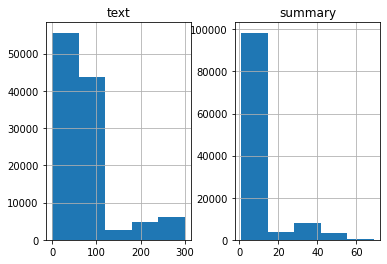

In [ ]:
pre['cleaned_text'] = pre['text']
pre['cleaned_summary'] = pre['summary']
text_count = []
summary_count = []
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))
#A quick look at the data
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [ ]:
#Check how much % of text have less than 30 words
cnt=0
for i in pre['cleaned_summary']:
    if(len(i.split())<=30):
        cnt=cnt+1
print(cnt/len(pre['cleaned_summary']))

0.911426729201445


In [ ]:
#Check how much % of text have more than 60 words
cnt=0
for i in pre['cleaned_text']:
    if(len(i.split())>=60):
        cnt=cnt+1
print(cnt/len(pre['cleaned_text']))

0.5088900076843583


In [ ]:
#This pre-defined lengths will act as the default sizes of the vectors that texts and summaries will be read upon in the model.
max_text_len=200
max_summary_len=30

In [ ]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
post_pre['text'][32141],post_pre['summary'][32141]

("E-commerce firm Flipkart is likely to burn as much as $2 billion cash in the next 18 months to push its sales growth, according to reports. Flipkart's cash burn would force rival Amazon to double its $5-billion commitment in its Indian subsidiary, reports added. Earlier this month, Walmart announced it would buy 77% stake in Flipkart for $16 billion.",
 'Flipkart likely to burn $2 billion cash in 18 months: Report')

In [ ]:
post_pre

,text,summary
0,enchanting crystal clear waters protected by a coral reef with white sandy beaches that stretch hundreds of kilometers this is watamu an old fishing village on the indian ocean in southeast kenya ...,watamu is a kenyan fishing village on the indian ocean known for its rich swahili culture it is now a water sports destination visitors can windsurf kitesurf and paddleboard
1,amal alamuddin george clooneys new wife is now amal clooney according to her law firms website its unclear whether the new mrs clooney is using her maiden name as a middle name making her amal ala...,amal alamuddin george clooneys new wife has taken his last name its unclear whether shell be amal alamuddin clooney or amal clooney the british attorney became clooneys wife in september
2,the twins get a checkup video nancy grace introduces on set the twins go out for a stroll the twins at months the twins in january video first video of nancy graces twins email to a friend,pictures of nancy graces twins john david and lucy elizabeth were born november come back to this site for regularly updated pictures
3,the only bears known to inhabit new yorks central park are at its zoo so how did a dead bear cub end up under a bush neither police nor park officials had an answer for that late monday hours afte...,bear cub not from central park zoo cubs body showed signs of trauma nypd is investigating as possible animal cruelty
4,cnna suicide bomb attack in iraq this week was carried out by an american jihadist isis claims the terrorist group released a photograph on tuesday of a masked fighter it identified as abu daood a...,isis claims a suicide attack in iraq was carried out by an american the claim has not been confirmed
...,...,...
100686,"A CRPF jawan was on Tuesday axed to death with sharp-edged weapons by Maoists at a local village fair in Chhattisgarh's insurgency-hit Bijapur district. As per preliminary information, Maoists att...",CRPF jawan axed to death by Maoists in Chhattisgarh
100687,"'Uff Yeh', the first song from the Sonakshi Sinha starrer upcoming drama film 'Noor' has been released. The song has been composed by Amaal Mallik with vocals by Armaan Malik and lyrics by Manoj M...",First song from Sonakshi Sinha's 'Noor' titled 'Uff Yeh' out
100688,"According to reports, a new version of the 1999 science fiction film 'The Matrix' is in development. Michael B Jordan will reportedly play the lead role in the film. Screenwriter Zak Penn is in ta...",'The Matrix' film to get a reboot: Reports
100689,A new music video shows rapper Snoop Dogg aiming a toy gun at a clown character parodying US President Donald Trump. The video also shows a TV airing a news conference with the headline 'Ronald Kl...,Snoop Dogg aims gun at clown dressed as Trump in new video


In [ ]:
#Add sostok and eostok. This will help the data to get processed within the decoder model. 
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
post_pre['text'][68321],post_pre['summary'][68321]

('An Italian professor has won her legal battle to be granted sick pay for the two-day leave she took to care for her unwell dog, in the first such instance in Italy. Her lawyers mentioned a law stating that people who abandon an animal to "grave suffering" face up to one year in prison and a â\x82¬10,000 (â\x82¹7.7 lakh) fine. ',
 'sostok Italy court grants woman paid sick leave to care for ill dog eostok')

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

In [ ]:


from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#preparing a tokenizer for x splitted data.
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
#A minor look at the vocab of the tokenizer. total word count and the frequencies of the word.
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 63.43805126326647
Total Coverage of rare words: 1.7156477237775063


In [ ]:
#Fitting the words within the training data to tokenizer.
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 37930


In [ ]:
#preparing a tokenizer for y splitted data.
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 72.52211906062261
Total Coverage of rare words: 5.323714986500327


In [ ]:
#Fitting the words within the training data to tokenizer.
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 12579


In [ ]:
#Deletes the values from the data which have not processed properly.
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
from keras import backend as K
import tensorflow as tf 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200


# Encoder inputs that will take the given sequence.
encoder_inputs = Input(shape=(max_text_len,))


#embedding layer that will try to learn word embeddings given by tokenizers.
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)


#Encoder LSTM's will process the data with their cell states to learn and hidden states to remember relevant parts as much as possible.

#The reason there are 3 processing layers is because to make model remember as much information as possible. There must be caution though.
#More layers will demand more power and take more time. 3 layers seemed to be optimum.

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer for the decoder parts.
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

#Processing layer for the decoder.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer by Bahdanau
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer will softmax the variables as the probability of the word appearing within the sequence.
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 37930
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 200)     7586000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 200, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
________________________________________________

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
#tf.test.is_built_with_cuda()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11492722423188176045
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14509932544
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13135653038774258315
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('CIFAR10{epoch:02d}.h5',period=2,save_freq='epoch',save_weights_only=False)


In [ ]:
#sparse categorical crossentropy is used to observe loss values of summaries.
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
#Early stopping is used to prevent overfitting.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es,model_checkpoint],batch_size=256, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))



Epoch 1/10
354/354 [==============================] - 1112s 3s/step - loss: 2.6217 - val_loss: 2.3614
Epoch 2/10
354/354 [==============================] - 1077s 3s/step - loss: 2.2579 - val_loss: 2.1358
Epoch 3/10
354/354 [==============================] - 1074s 3s/step - loss: 2.0689 - val_loss: 1.9932
Epoch 4/10
354/354 [==============================] - 1070s 3s/step - loss: 1.9370 - val_loss: 1.8988
Epoch 5/10
354/354 [==============================] - 1058s 3s/step - loss: 1.8361 - val_loss: 1.8350
Epoch 6/10
354/354 [==============================] - 1064s 3s/step - loss: 1.7543 - val_loss: 1.7818
Epoch 7/10
354/354 [==============================] - 1070s 3s/step - loss: 1.6866 - val_loss: 1.7418
Epoch 8/10
354/354 [==============================] - 1068s 3s/step - loss: 1.6272 - val_loss: 1.7084
Epoch 9/10
354/354 [==============================] - 1070s 3s/step - loss: 1.5756 - val_loss: 1.6818
Epoch 10/10
354/354 [==============================] - 1072s 3s/step - loss: 1.529

In [ ]:
import keras_preprocessing.text
import io
import json

In [ ]:
#Saving tokenizers to be used in FastAPI model
tokenizer_json1 = x_tokenizer.to_json()
with io.open('tokenizer1.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json1, ensure_ascii=False))
tokenizer_json2 = y_tokenizer.to_json()
with io.open('tokenizer2.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json2, ensure_ascii=False))

In [ ]:
import keras_preprocessing.text
import io
import json
#Loading tokenizers(test related)
with open('tokenizer1.json') as f:
    data = json.load(f)
    x_tokenizer = keras_preprocessing.text.tokenizer_from_json(data)
with open('tokenizer2.json') as f:
    data = json.load(f)
    y_tokenizer = keras_preprocessing.text.tokenizer_from_json(data)

In [ ]:

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference. Will put energy values to the given output
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
#Saving models for FastAPI
decoder_model.save('decoder.h5')
encoder_model.save('encoder.h5')

In [ ]:
import tensorflow as tf
#Loading the models(test-wise)
encoder_model=tf.keras.models.load_model('encoder.h5')
decoder_model=tf.keras.models.load_model('decoder.h5',custom_objects={'AttentionLayer': AttentionLayer})

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
#seq2summary function will transform original summary sequences to string.
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString
#seq2text function will transform original long text sequences to string.
def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

90621

In [ ]:
#This part will be used within the validation data and what scores it will produce in the sample they are given.
hold_val_long=[seq2text(x) for x in x_val[:5000]]
hold_val_pred=[decode_sequence(x.reshape(1,200)) for x in x_val[:5000]]
hold_val_or=[seq2summary(x) for x in y_val[:5000]]
bleu=[]
rouge_1=[]
rouge_2=[]
rouge_l=[]

avr_rouge=rouge.get_scores(hold_val_pred, hold_val_or, avg=True)
for s in range(0,len(hold_val_pred)):
  bleu.append(sentence_bleu([hold_val_or[s].split()],hold_val_pred[s].split()))
  holder_rouge=rouge.get_scores(hold_val_pred[s], hold_val_or[s])
  rouge_1.append(holder_rouge[0]['rouge-1'])
  rouge_2.append(holder_rouge[0]['rouge-2'])
  rouge_l.append(holder_rouge[0]['rouge-l'])

  
data_stat=pd.DataFrame()
data_stat['long']=hold_val_long
data_stat['prediction']=hold_val_pred
data_stat['original']=hold_val_or
data_stat['bleu']=bleu
data_stat['rouge_1']=rouge_1
data_stat['rouge_2']=rouge_2
data_stat['rouge_l']=rouge_l

In [ ]:
print(avr_rouge)

{'rouge-1': {'f': 0.21120454001911, 'p': 0.2245580370131728, 'r': 0.20537233774011687}, 'rouge-2': {'f': 0.047123618115731306, 'p': 0.050848900473623164, 'r': 0.0455177442941836}, 'rouge-l': {'f': 0.20614177196804745, 'p': 0.23662982739482605, 'r': 0.18999913272872826}}


In [ ]:
data_stat.to_csv('seq2seq_eng_att_stats.csv')

In [ ]:
data_stat

,long,prediction,original,bleu,rouge_1,rouge_2,rouge_l
0,the kerala unit of congress has supported party mp shashi tharoor's claim that the bjp will create a hindu pakistan' if it wins the 2019 lok sabha elections this comes after the congress disapprov...,congress slams cong mp for not to join its name,kerala congress supports tharoor's 'hindu pakistan' remark,0.562341,"{'f': 0.11764705397923896, 'p': 0.1, 'r': 0.14285714285714285}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.11764705397923896, 'p': 0.1, 'r': 0.14285714285714285}"
1,the maharashtra plastic ban will result in revenue loss of up to â¹15 000 crore and will cost nearly 3 lakh jobs the plastic bags manufacturers association of india has claimed calling the ban di...,delhi govt bans â¹2 5 crore fine on tax evasion,maha plastic ban could cost industry â¹15 000 crore 3l jobs,0.508827,"{'f': 0.09523809024943337, 'p': 0.1, 'r': 0.09090909090909091}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.09523809024943337, 'p': 0.1, 'r': 0.09090909090909091}"
2,cash strapped jet airways is reportedly withdrawing flight services on seven gulf routes from december 5 the naresh goyal led airline will stop operating 39 services per week to doha muscat abu dh...,jet airways pilots to get flying jet airways for jet airways,cash strapped jet airways may stop flying on 7 gulf routes,0.406380,"{'f': 0.2727272677272728, 'p': 0.2727272727272727, 'r': 0.2727272727272727}","{'f': 0.09999999500000027, 'p': 0.1, 'r': 0.1}","{'f': 0.3333333285802469, 'p': 0.42857142857142855, 'r': 0.2727272727272727}"
3,started in the garage of late co founder steve jobs in 1976 apple became the first us company to hit a 1 trillion valuation on thursday jobs sold his volkswagen minibus while co founder steve wozn...,apple becomes 1st indian to sell 100 billion in 3 yrs,apple started from garage in now a trillion dollar giant,0.652994,"{'f': 0.1904761854875285, 'p': 0.18181818181818182, 'r': 0.2}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.1904761854875285, 'p': 0.18181818181818182, 'r': 0.2}"
4,ahmadi a seven year old boy who met lionel messi in 2016 had to abandon his home with family in afghanistan's after being displaced by taliban in november we were living in fear because people tho...,messi kills self driving in afghanistan,7 year old boy who met messi abandons home after taliban attack,0.235054,"{'f': 0.11111110666666683, 'p': 0.16666666666666666, 'r': 0.08333333333333333}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.11111110666666683, 'p': 0.16666666666666666, 'r': 0.08333333333333333}"
...,...,...,...,...,...,...,...
4995,journalist barkha dutt while responding to censor board's decision to edit out from her name in the film 'noor' tweeted barkha without the dutt dear censor board is kinda like minus channa i am a ...,cbfc to make new film to play padmavati,barkha without dutt like barkha to cbfc,0.707107,"{'f': 0.266666661688889, 'p': 0.25, 'r': 0.2857142857142857}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.1538461488757398, 'p': 0.14285714285714285, 'r': 0.16666666666666666}"
4996,actor turned politician kamal haasan has said he somehow supports congress president rahul gandhi over his remark that he would have thrown the file proposing demonetisation into a dustbin if he w...,rahul gandhi is not a dig at rahul haasan,haasan supports rahul on in remark,0.686589,"{'f': 0.2666666618666667, 'p': 0.2222222222222222, 'r': 0.3333333333333333}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.14285713795918387, 'p': 0.125, 'r': 0.16666666666666666}"
4997,a daily worker who recently built his house with his savings in an odisha village found it infested with over 100 baby on friday the snake helpline ngo was called which said we are still looking f...,man who went to save baby in gujarat village,odisha worker finds house filled with over 100 baby,0.577350,"{'f': 0.11111110611111134, 'p': 0.1111111111111111, 'r': 0.1111111111111111}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.11111110611111134, 'p': 0.1111111111111111, 'r'

In [ ]:
hold_val['y']=seq2summary(y_val[i])
hold_val

In [ ]:
hold_val.to_csv('/content/gdrive/MyDrive/hold_val1.csv')

In [ ]:
seq2summary(y_val[1]).split()

['maha',
 'plastic',
 'ban',
 'could',
 'cost',
 'industry',
 'â\x82¹15',
 '000',
 'crore',
 '3l',
 'jobs']

In [ ]:
!pip install rouge
from rouge import Rouge
rouge = Rouge()

In [ ]:
tresy=rouge.get_scores(decode_sequence(x_val[1].reshape(1,200)), seq2summary(y_val[1]))

In [ ]:
data_stat.tail(10)

,prediction,original,bleu,rouge_1,rouge_2,rouge_l
1990,mit develops startup to raise 1 million,20 year old entrepreneur is a lie claims mit study,0.152202,"{'f': 0.11764705397923896, 'p': 0.14285714285714285, 'r': 0.1}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.11764705397923896, 'p': 0.14285714285714285, 'r': 0.1}"
1991,bcci to spend crore in 2016 19 year old bcci,bcci has spent â¹4 62 crore on office coa to sc,0.364872,"{'f': 0.2857142807256236, 'p': 0.3, 'r': 0.2727272727272727}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.1999999950500001, 'p': 0.2222222222222222, 'r': 0.18181818181818182}"
1992,up man who killed up cm on his death,declare my son a martyr mother of kasganj violence victim,0.193897,"{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.0, 'p': 0.0, 'r': 0.0}"
1993,warne named ipl as ipl 2017 2017,shane warne appointed rajasthan mentor for ipl 2018,0.270352,"{'f': 0.266666661688889, 'p': 0.2857142857142857, 'r': 0.25}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.3076923029585799, 'p': 0.4, 'r': 0.25}"
1994,scientists develop new brain of heart surgery,3d printed heart made that beats like human heart,0.205986,"{'f': 0.12499999507812519, 'p': 0.14285714285714285, 'r': 0.1111111111111111}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.13333332835555575, 'p': 0.14285714285714285, 'r': 0.125}"
1995,ex pak pm nawaz sharif killed in car crash,bhutto assassinated on this day 10 years ago,0.212541,"{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.0, 'p': 0.0, 'r': 0.0}"
1996,solar eclipse may be used by solar eclipse study,what are solar and how do they form,0.183456,"{'f': 0.11764705384083066, 'p': 0.1111111111111111, 'r': 0.125}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.13333332835555575, 'p': 0.14285714285714285, 'r': 0.125}"
1997,designer of daughter passes away aged 89,kate father passes away one night before her funeral,0.365196,"{'f': 0.24999999507812506, 'p': 0.2857142857142857, 'r': 0.2222222222222222}","{'f': 0.14285713795918387, 'p': 0.16666666666666666, 'r': 0.125}","{'f': 0.24999999507812506, 'p': 0.2857142857142857, 'r': 0.2222222222222222}"
1998,serena williams is not a player of fixing ex aus player,father threatens with legal action,0.225754,"{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.0, 'p': 0.0, 'r': 0.0}"
1999,man tries to stop smoking at airport,man stopped from taking wine bottles drinks them at airport,0.334186,"{'f': 0.3529411716262976, 'p': 0.42857142857142855, 'r': 0.3}","{'f': 0.1333333285333335, 'p': 0.16666666666666666, 'r': 0.1111111111111111}","{'f': 0.3529411716262976, 'p': 0.42857142857142855, 'r': 0.3}"


In [ ]:
data=pd.read_csv('seq2seq_eng_att_stats.csv')

In [ ]:
data['original'][4990]

"bulls t on kangana's claim of directing 70 of manikarnika "

In [ ]:
data.tail(10)

,Unnamed: 0,long,prediction,original,bleu,rouge_1,rouge_2,rouge_l
4990,4990,'manikarnika the queen of jhansi' co director krish while speaking about kangana ranaut's claim that she directed 70 of the film said it's bulls t in the first half of manikarnika 20 25 film has b...,kangana is the of the director of kangana,bulls t on kangana's claim of directing 70 of manikarnika,0.550695,"{'f': 0.22222221728395072, 'p': 0.25, 'r': 0.2}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.14285713826530627, 'p': 0.2, 'r': 0.1111111111111111}"
4991,4991,anushka sharma retweeted a picture shared by former australian cricketer brett lee featuring herself lee and her 'sui dhaaga' co star varun dhawan alongside the picture anushka shared a dialogue f...,anushka shares pic of his birthday,anushka sharma tweets dialogue to brett lee,0.540854,"{'f': 0.1538461488757398, 'p': 0.16666666666666666, 'r': 0.14285714285714285}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.1538461488757398, 'p': 0.16666666666666666, 'r': 0.14285714285714285}"
4992,4992,a 13 year old german boy handed out 11 000 over â¹7 lakh to his peers in an effort to make friends according to reports police in received a call saying a young boy was giving away suspiciously l...,man spends â¹2 5 lakh for not paying for money to get,13 year old german boy distributes â¹7 lakh to make friends,0.638943,"{'f': 0.1739130384877128, 'p': 0.16666666666666666, 'r': 0.18181818181818182}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.18181817681818196, 'p': 0.18181818181818182, 'r': 0.18181818181818182}"
4993,4993,a local congress leader was shot dead and his son critically injured outside their home by nearly a dozen armed assailants at a village madhya pradesh a police official said on monday the police h...,congress leader shot dead by mob in madhya pradesh,congress leader shot dead in mp sarpanch among 12 booked,0.282410,"{'f': 0.5263157844875347, 'p': 0.5555555555555556, 'r': 0.5}","{'f': 0.35294117148788934, 'p': 0.375, 'r': 0.3333333333333333}","{'f': 0.5263157844875347, 'p': 0.5555555555555556, 'r': 0.5}"
4994,4994,a court in mumbai has convicted gangster chhota rajan and nine others for the murder of journalist dey in 2011 two others accused in the case including journalist vora have been acquitted rajan wa...,mumbai court gets life term for murder of journalist,gangster chhota rajan convicted in 2011 journo murder case,0.577350,"{'f': 0.11111110611111134, 'p': 0.1111111111111111, 'r': 0.1111111111111111}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.11111110611111134, 'p': 0.1111111111111111, 'r': 0.1111111111111111}"
4995,4995,journalist barkha dutt while responding to censor board's decision to edit out from her name in the film 'noor' tweeted barkha without the dutt dear censor board is kinda like minus channa i am a ...,cbfc to make new film to play padmavati,barkha without dutt like barkha to cbfc,0.707107,"{'f': 0.266666661688889, 'p': 0.25, 'r': 0.2857142857142857}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.1538461488757398, 'p': 0.14285714285714285, 'r': 0.16666666666666666}"
4996,4996,actor turned politician kamal haasan has said he somehow supports congress president rahul gandhi over his remark that he would have thrown the file proposing demonetisation into a dustbin if he w...,rahul gandhi is not a dig at rahul haasan,haasan supports rahul on in remark,0.686589,"{'f': 0.2666666618666667, 'p': 0.2222222222222222, 'r': 0.3333333333333333}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.14285713795918387, 'p': 0.125, 'r': 0.16666666666666666}"
4997,4997,a daily worker who recently built his house with his savings in an odisha village found it infested with over 100 baby on friday the snake helpline ngo was called which said we are still looking f...,man who went to save baby in gujarat village,odisha worker finds house filled with over 100 baby,0.577350,"{'f': 0.11111110611111134, 'p': 0.1111111111111111, 'r': 0.1111111111111111}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.11111110611111134, 'p

In [ ]:
data_stat.tail(10)

,long,prediction,original,bleu,rouge_1,rouge_2,rouge_l
4990,'manikarnika the queen of jhansi' co director krish while speaking about kangana ranaut's claim that she directed 70 of the film said it's bulls t in the first half of manikarnika 20 25 film has b...,kangana is the of the director of kangana,bulls t on kangana's claim of directing 70 of manikarnika,0.550695,"{'f': 0.22222221728395072, 'p': 0.25, 'r': 0.2}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.14285713826530627, 'p': 0.2, 'r': 0.1111111111111111}"
4991,anushka sharma retweeted a picture shared by former australian cricketer brett lee featuring herself lee and her 'sui dhaaga' co star varun dhawan alongside the picture anushka shared a dialogue f...,anushka shares pic of his birthday,anushka sharma tweets dialogue to brett lee,0.540854,"{'f': 0.1538461488757398, 'p': 0.16666666666666666, 'r': 0.14285714285714285}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.1538461488757398, 'p': 0.16666666666666666, 'r': 0.14285714285714285}"
4992,a 13 year old german boy handed out 11 000 over â¹7 lakh to his peers in an effort to make friends according to reports police in received a call saying a young boy was giving away suspiciously l...,man spends â¹2 5 lakh for not paying for money to get,13 year old german boy distributes â¹7 lakh to make friends,0.638943,"{'f': 0.1739130384877128, 'p': 0.16666666666666666, 'r': 0.18181818181818182}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.18181817681818196, 'p': 0.18181818181818182, 'r': 0.18181818181818182}"
4993,a local congress leader was shot dead and his son critically injured outside their home by nearly a dozen armed assailants at a village madhya pradesh a police official said on monday the police h...,congress leader shot dead by mob in madhya pradesh,congress leader shot dead in mp sarpanch among 12 booked,0.282410,"{'f': 0.5263157844875347, 'p': 0.5555555555555556, 'r': 0.5}","{'f': 0.35294117148788934, 'p': 0.375, 'r': 0.3333333333333333}","{'f': 0.5263157844875347, 'p': 0.5555555555555556, 'r': 0.5}"
4994,a court in mumbai has convicted gangster chhota rajan and nine others for the murder of journalist dey in 2011 two others accused in the case including journalist vora have been acquitted rajan wa...,mumbai court gets life term for murder of journalist,gangster chhota rajan convicted in 2011 journo murder case,0.577350,"{'f': 0.11111110611111134, 'p': 0.1111111111111111, 'r': 0.1111111111111111}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.11111110611111134, 'p': 0.1111111111111111, 'r': 0.1111111111111111}"
4995,journalist barkha dutt while responding to censor board's decision to edit out from her name in the film 'noor' tweeted barkha without the dutt dear censor board is kinda like minus channa i am a ...,cbfc to make new film to play padmavati,barkha without dutt like barkha to cbfc,0.707107,"{'f': 0.266666661688889, 'p': 0.25, 'r': 0.2857142857142857}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.1538461488757398, 'p': 0.14285714285714285, 'r': 0.16666666666666666}"
4996,actor turned politician kamal haasan has said he somehow supports congress president rahul gandhi over his remark that he would have thrown the file proposing demonetisation into a dustbin if he w...,rahul gandhi is not a dig at rahul haasan,haasan supports rahul on in remark,0.686589,"{'f': 0.2666666618666667, 'p': 0.2222222222222222, 'r': 0.3333333333333333}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.14285713795918387, 'p': 0.125, 'r': 0.16666666666666666}"
4997,a daily worker who recently built his house with his savings in an odisha village found it infested with over 100 baby on friday the snake helpline ngo was called which said we are still looking f...,man who went to save baby in gujarat village,odisha worker finds house filled with over 100 baby,0.577350,"{'f': 0.11111110611111134, 'p': 0.1111111111111111, 'r': 0.1111111111111111}","{'f': 0.0, 'p': 0.0, 'r': 0.0}","{'f': 0.11111110611111134, 'p': 0.1111111111111111, 'r': 0.1111111111111111}"
49

In [ ]:

for i in range(4990,5000):
    print("Review:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,200)))
    print('BLEU score -> {}'.format(sentence_bleu([seq2summary(y_val[i]).split()], decode_sequence(x_val[i].reshape(1,200)).split())))
    print(rouge.get_scores(decode_sequence(x_val[i].reshape(1,200)), seq2summary(y_val[i])))
    print(type(rouge.get_scores(decode_sequence(x_val[i].reshape(1,200)), seq2summary(y_val[i]))))
    print("\n")

Review: 'manikarnika the queen of jhansi' co director krish while speaking about kangana ranaut's claim that she directed 70 of the film said it's bulls t in the first half of manikarnika 20 25 film has been shot by kangana while in the second half only 10 is shot by her he claimed krish further said he is hurt by the controversy 
Original summary: bulls t on kangana's claim of directing 70 of manikarnika 
Predicted summary:  kangana is the of the director of kangana
BLEU score -> 0.5506953149031838
[{'rouge-1': {'f': 0.22222221728395072, 'p': 0.25, 'r': 0.2}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.14285713826530627, 'p': 0.2, 'r': 0.1111111111111111}}]
<class 'list'>


Review: anushka sharma retweeted a picture shared by former australian cricketer brett lee featuring herself lee and her 'sui dhaaga' co star varun dhawan alongside the picture anushka shared a dialogue from 'lagaan' writing brett lee always remember ki bhi moti ho zaroor hai ' the phrase translat